# Predicting heart disease using Machine Learning approach

**Focus** - To build a machine learning model that will predict with maximum accuracy whether or not an individual is suffering from a heart disease based on some medical data.

**Approach**

1. Problem definition
 - Given the clinical parameters about a patient, is it possible to predict if they have a heart disease?
2. Data
 - Obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease)
 - Also available at [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)
3. Evaluation
 - Try reaching maximum accuracy during the proof of concept
4. Features
 - 
5. Modelling
6. Experimentation



**Importing the tools we will need for `exploratory data analysis`**


In [1]:
# importing the standard libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models from sci-kit learn for machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# for model evaluations

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

**Loading the data**

In [2]:
hd = pd.read_csv("https://raw.githubusercontent.com/ineelhere/Machine-Learning-and-Data-Science/master/Milestone%20Project%201/data/heart-disease.csv")
hd #just to check if the data has been properly imported

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Exploring the imported data**

In [3]:
#first 5 rows of the dataset
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#last 5 rows of the dataset
hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# shape (rows,columns) of the dataset
hd.shape

(303, 14)

In [12]:
# description of data in the dataset
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# data information
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
# number of classes in particular column - counting the values
hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

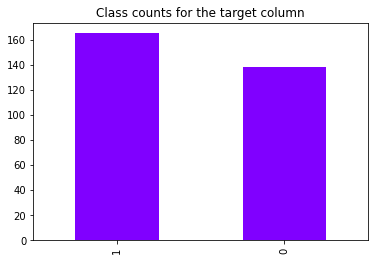

In [7]:
# visualizing the above
hd.target.value_counts().plot.bar(colormap='rainbow', title='Class counts for the target column');

In [10]:
# inspecting missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# so no missing values above! 

# now comparing sex column with target column
pd.crosstab(hd.target, hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


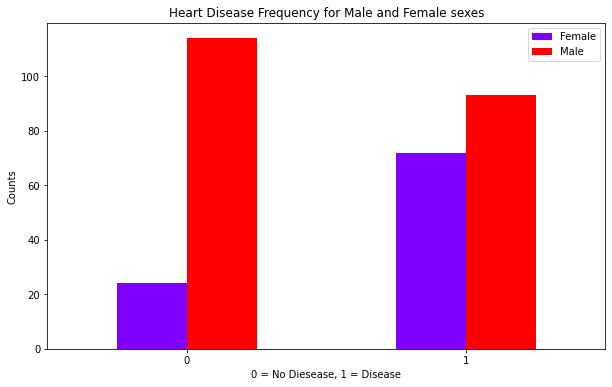

In [17]:
# visualizing the above output (the crosstab)
# Create a plot of crosstab
pd.crosstab(hd.target, hd.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    colormap = 'rainbow')

plt.title("Heart Disease Frequency for Male and Female sexes")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Counts")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);